## Goal
Use your data science knowledge to explore the data provided and create Linear Regression models to predict how many bikes will be rented based on historical information.
## Course Learning Outcomes (CLO) Assessed
- CLO #1 Explain common models and processing pipelines in machine learning applications
- CLO #2 Apply machine learning algorithms to design solutions for real problems
- CLO #4 Analyse results and solutions to verify their correctness and impact on decision making
## Assessment Criteria and Rubric
This assessment is about data exploration and reasoning over the modelling outcome.
You will likely face overfitting and will have to iterate between data engineering and modelling until you get satisfactory results.
It is taken for granted that the code must be readable and has comments indicating what are you doing. Poor readability will detract points from grading.
### Data Engineering
When appropriate:
- Data quality (no nulls or structural errors).
- Dummy variables created.
- New variables are created (when appropriate).
- Outliers treatments
### Exploratory Data Analysis
#### Exploration of:
- Numerical features
- Categorical features
- Statistical analysis
- Correlations
### Data pre-processing
#### When appropriate:
- Scaling
- Train/Test split
### Modelling
#### At least:T
- Three LR models (Vanilla, Ridge, Lasso).
- RMSE at acceptable levels.
#### Nice to have:
- No overfitting. (r2 near 1, or RMSE below 0 is normally a clear indicator that you are overfitting)
- Models RMSE at acceptable levels.
- Models R2 at acceptable levels.
- Parameters optimised (when appropriate).
### Reasoning
1. Explain why you decided to do things the way you did.
2. For example, but not limited to:
3. Why plot "XYZ"? What did you want to see?
4. Why use the "XYZ" approach? (scaling or not scaling, using parameter A or B etc.)
5. Why do you think model A is better than B?
6. Why feature A has more relevance than feature B?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Energy_Consumption_Data.csv')

In [3]:
# df.info()
df.head()

,House_ID,Month,Area_sq_ft,Occupants,Heating_Type,Age_of_Building,Insulation_Quality,Daily_Average_Consumption_kWh,Season,Energy_Efficiency_Rating,Tariff_Type,Bill_Amount,Renewable_Energy_Installed,Temperature_Average,Power_Outages,Monthly_Consumption_kWh
0,7271,Jan,662.0,5,NaN,27,Good,14.335539,Spring,2,Time-of-Use,88.741986,Yes,55.467771,1,501.232780
1,861,Oct,1253.0,2,NaN,13,cverage,25.917839,Spring,3,Variable,92.354940,Yes,36.388473,1,742.352878
2,5391,Dec,NaN,3,Gas,22,Poor,33.127843,Summer,6,Fixed,96.708638,No,94.550243,0,1018.708608
3,5192,Aug,1535.0,1,NaN,16,Good,7.451494,Autumn,6,Variable,95.568663,No,62.862087,2,199.420939
4,5735,Sep,1336.0,5,NaN,13,Excellent,34.649571,Winter,10,Variable,NaN,No,93.559405,3,933.151370


In [4]:
# Useful variables
columnNames = ['House_ID', 'Month', 'Area_sq_ft', 'Occupants', 'Heating_Type',
    'Age_of_Building', 'Insulation_Quality',
    'Daily_Average_Consumption_kWh', 'Season', 'Energy_Efficiency_Rating',
    'Tariff_Type', 'Bill_Amount', 'Renewable_Energy_Installed',
    'Temperature_Average', 'Power_Outages', 'Monthly_Consumption_kWh'
    ]

In [5]:
def printColumnValues(df, column_name):
    # Convert the column values to a list
    values = df[column_name].unique().tolist()

    # Print the list
    print(values)

In [6]:
# Initialize an empty list to store the sizes
sizes = []
def dfSize(df):
    # Get the current size of the DataFrame
    current_size = df.shape
    print(f"Current size: {current_size}")
    # If there are previous sizes stored, print the last one
    if sizes:
        print(f"Previous size: {sizes[-1]}")
    # Store the current size
    sizes.append(current_size)

In [7]:
def columDistinctOccurrences(df, column_name):
    distinct_values = {}
    for column in column_name:
        distinct_values[column] = df[column].unique()
        print(f"{str(df[column].unique())}, occurrences: {df[column].value_counts()}")

### Cleaning Data To-Do
After using the above function to see what kind of unique variables are within each of the columns. I have summarized how to approach the `data cleaning` 
- ~~`House_ID` - Drop~~
- ~~`Month` - Drop~~
- ~~`Area_sq_ft` - Check Float~~
- ~~`Occupants` - convert 'five' to 5~~
- ~~`Heating_Type` - Word length is word~~
- ~~`Age_of_Building` - remove --~~
- ~~`Insulation_Quality` - Word length is word~~
- ~~`Daily_Average_Consumption_kWh` - no **negatives**, float, no **Null**~~
~~- `Season` - Use this to sort~~
- ~~`Energy_Efficiency_Rating` - 1-10 not too sure how useful~~
- ~~`Tariff_Type` - Its fucked Word length is Words~~
- `Bill_Amount` - no **negatives**, float, no **Null**
- `Renewable_Energy_Installed` - Kind of useless
- `Temperature_Average` - not really that useful
- `Power_Outages` - remove as it will affect the linear regression
- `Monthly_Consumption_kWh` - cant figure out if its derived from daily consumption

In [8]:
dfSize(df)

Current size: (100000, 16)


In [9]:
# df.dtypes

In [10]:
# Drop columns that are not useful
# We do not need to know what house ID is consuming the energy
df.drop('House_ID', axis=1, inplace=True)
df.head() # Check if the column was dropped

,Month,Area_sq_ft,Occupants,Heating_Type,Age_of_Building,Insulation_Quality,Daily_Average_Consumption_kWh,Season,Energy_Efficiency_Rating,Tariff_Type,Bill_Amount,Renewable_Energy_Installed,Temperature_Average,Power_Outages,Monthly_Consumption_kWh
0,Jan,662.0,5,NaN,27,Good,14.335539,Spring,2,Time-of-Use,88.741986,Yes,55.467771,1,501.232780
1,Oct,1253.0,2,NaN,13,cverage,25.917839,Spring,3,Variable,92.354940,Yes,36.388473,1,742.352878
2,Dec,NaN,3,Gas,22,Poor,33.127843,Summer,6,Fixed,96.708638,No,94.550243,0,1018.708608
3,Aug,1535.0,1,NaN,16,Good,7.451494,Autumn,6,Variable,95.568663,No,62.862087,2,199.420939
4,Sep,1336.0,5,NaN,13,Excellent,34.649571,Winter,10,Variable,NaN,No,93.559405,3,933.151370


In [11]:
# We do not need to know the month as season is a better general indicator for prediction
df.drop('Month', axis=1, inplace=True)
df.head() # Check if the column was dropped


,Area_sq_ft,Occupants,Heating_Type,Age_of_Building,Insulation_Quality,Daily_Average_Consumption_kWh,Season,Energy_Efficiency_Rating,Tariff_Type,Bill_Amount,Renewable_Energy_Installed,Temperature_Average,Power_Outages,Monthly_Consumption_kWh
0,662.0,5,NaN,27,Good,14.335539,Spring,2,Time-of-Use,88.741986,Yes,55.467771,1,501.232780
1,1253.0,2,NaN,13,cverage,25.917839,Spring,3,Variable,92.354940,Yes,36.388473,1,742.352878
2,NaN,3,Gas,22,Poor,33.127843,Summer,6,Fixed,96.708638,No,94.550243,0,1018.708608
3,1535.0,1,NaN,16,Good,7.451494,Autumn,6,Variable,95.568663,No,62.862087,2,199.420939
4,1336.0,5,NaN,13,Excellent,34.649571,Winter,10,Variable,NaN,No,93.559405,3,933.151370


After dropping `Month` and `House_ID` the data-frame can start to be cleaned.

In [12]:
dfSize(df)

Current size: (100000, 14)
Previous size: (100000, 16)


#### Area Square Foot
- Drop `NaN` rows
- Anything below equal or below `zero` removed and needs to be `float`
- ***fix*** Value may be not be `float` but valid !!!! Still needs to be done

In [13]:
df = df.dropna(subset=['Area_sq_ft'])  # Drop rows with NaN in 'Area_sq_ft' column
df = df[df['Area_sq_ft'].apply(lambda x: isinstance(x, float) and x > 0)]  # Keep rows where 'Area_sq_ft' is a float and > 0
dfSize(df)

Current size: (94877, 14)
Previous size: (100000, 14)


#### Occupants column
- Issue the word 'five' it is a `string` not a `int` also multiple times misspelt.

In [14]:
df.dropna(subset=['Occupants'], inplace = True)  # Drop rows with NaN in 'Occupants' column

printColumnValues(df, 'Occupants')

def convertFiveTo5(value):
    try:
        return int(value)
    except ValueError:
        return 5

df['Occupants'] = df['Occupants'].apply(convertFiveTo5)

printColumnValues(df, 'Occupants')
dfSize(df)



['5', '2', '1', '4', '3', 'five', 'fwve', 'fiwe', 'fpve', 'fave', 'fiva', 'fivg', 'mive', 'ftve', 'wive', 'fivt', 'fiye', 'sive', 'nive', 'fiae', 'jive', 'live', 'fsve', 'tive', 'fize', 'fivc', 'yive', 'fivs', 'fivd', 'fide', 'flve', 'oive', 'iive', 'kive', 'cive', 'qive', 'fihe', 'hive', 'fivn', 'fivl', 'fife', 'fiee', 'fire', 'fqve', 'fbve', 'fije', 'fiie', 'fibe', 'rive', 'fixe', 'fdve', 'ffve', 'fivr', 'fivm', 'fxve', 'fiqe', 'fivx', 'fivq', 'fgve']
[5, 2, 1, 4, 3]
Current size: (94877, 14)
Previous size: (94877, 14)


#### Heating Type
1. lots of words are **misspelt**; use the `length` of the words to figure out what the word is.
   - Electric (8)
   - Gas (3)
   - None (4)
2. `NaN` Means they don't have heating so <u>**do not** drop rows<u>

In [15]:
printColumnValues(df, 'Heating_Type')

dfSize(df)
df.dropna(subset=['Heating_Type'], inplace = True)  # Drop rows with NaN in 'Heating_Type' column
# df = df.fillna({'Heating_Type': 'None'})

def correctHeatingType(value):
    if len(value) == 8:
        return 'Electric'
    elif len(value) == 4:
        return 'None'
    elif len(value) == 3:
        return 'Gas'
    else:
        ValueError('Heating type not recognized')

dfSize(df)

df['Heating_Type'] = df['Heating_Type'].apply(correctHeatingType)

printColumnValues(df, 'Heating_Type')
dfSize(df)

[nan, 'Gas', 'Electric', 'Electxic', 'plectric', 'Gaz', 'Noxe', 'was', 'Eeectric', 'Elertric', 'Noni', 'Nonz', 'Nonk', 'Elejtric', 'Ngne', 'Ekectric', 'Ezectric', 'ras', 'Gws', 'Nine', 'Electrkc', 'Eluctric', 'Electris', 'Nonu', 'Nfne', 'Electfic', 'jone', 'Gds', 'Gak', 'Nxne', 'Nbne', 'bas', 'Eleczric', 'Elecgric', 'Electrig', 'ylectric', 'Eledtric', 'Electuic', 'Nonj', 'Nonr', 'Gae', 'Gag', 'Gjs', 'none', 'Electrcc', 'ulectric', 'zas', 'Gay', 'Nyne', 'Elecdric', 'Eldctric', 'Esectric', 'Gan', 'Ndne', 'Elrctric', 'Noce', 'has', 'Eleceric', 'Nsne', 'Elehtric', 'vlectric', 'xas', 'eas', 'qas', 'qlectric', 'kas', 'Electrbc', 'Elecsric', 'Nope', 'Electrid', 'Nonn', 'Elmctric', 'Nzne', 'Gad', 'Noge', 'Ghs', 'Ejectric', 'Gax', 'Nore', 'Gcs', 'Nose', 'Gat', 'Nony', 'Eleclric', 'Nonp', 'Electrzc', 'Eleptric', 'Gai', 'Eljctric', 'Eleetric', 'Electriw', 'Gal', 'fas', 'Electrxc', 'Ewectric', 'Ges', 'Gab', 'mas', 'Nonm', 'Gah', 'Noze', 'Elhctric', 'tone', 'Node', 'Noke', 'Gis', 'Electrix', 'Elect

In [16]:
heatingMapping = {
    'Electric': 2,
    'Gas': 1,
    'None': 0,
}

df['Heating_Type_numeric'] = df['Heating_Type'].map(heatingMapping)

In [17]:
columDistinctOccurrences(df, ['Heating_Type'])

['Gas' 'Electric' 'None'], occurrences: Heating_Type
Electric    29998
Gas         29966
None         1457
Name: count, dtype: int64


### Age of building
1. remove values `>0` `#1 
2. remove `NaN` values

In [18]:
printColumnValues(df, 'Age_of_Building')
dfSize(df)

df.dropna(subset=['Age_of_Building'], inplace = True)  # Drop rows with NaN in 'Occupants' column
df = df[df['Age_of_Building'].apply(lambda x: isinstance(x, int) and x >= 0)] #! TODO: can a building be 0 years old?

printColumnValues(df, 'Age_of_Building')
dfSize(df)

[0, 36, 33, 23, 26, 15, 9, 8, 46, 18, -5, 40, -1, 21, 32, 29, 12, 24, 13, 20, 30, 16, 19, 7, 45, 43, 42, 10, 22, 14, 34, 28, 11, 27, 6, -2, 35, 2, 4, 25, 38, 31, 17, 5, 1, 39, 56, 37, 3, 47, 41, -3, -4, -12, -13, 48, -10, 44, -11, -6, 52, -7, -9, -8, 49, 50, 54, -14, -15, 55, 51, 53, -16, -18, 57, -21, 59, -19, 66, -17]
Current size: (61421, 15)
Previous size: (61421, 14)
[0, 36, 33, 23, 26, 15, 9, 8, 46, 18, 40, 21, 32, 29, 12, 24, 13, 20, 30, 16, 19, 7, 45, 43, 42, 10, 22, 14, 34, 28, 11, 27, 6, 35, 2, 4, 25, 38, 31, 17, 5, 1, 39, 56, 37, 3, 47, 41, 48, 44, 52, 49, 50, 54, 55, 51, 53, 57, 59, 66]
Current size: (60304, 15)
Previous size: (61421, 15)


### Insulation Quality
1. lots of words are **misspelt**; use the `length` of the words to figure out what the word is.
   - Excellent (9)
   - Average (7)
   - Good (4)
   - Poor (4)

In [19]:
def levenshteinDistance(s1, s2): #? Remove this or use for months
    if len(s1) < len(s2):
        return levenshteinDistance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

In [20]:
printColumnValues(df, 'Insulation_Quality')
dfSize(df)

df.dropna(subset=['Insulation_Quality'], inplace = True)  # Drop rows with NaN in 'Insulation_Quality' column

funny_values =[]

def correctRating(value):
    if len(value) == 9:
        return 'Excellent'
    elif len(value) == 7:
        return 'Average'
    elif value[:1] == 'P':
        return 'Poor'
    elif value[:1] == 'G':
        return 'Good'
    elif value[-2:] == 'or':
        return 'Poor'
    elif value[-2:] == 'od':
        return 'Good'
    else:
        funny_values.append(value)
        word_list = ['Poor', 'Good']
        return min(word_list, key=lambda x: levenshteinDistance(value, x)) #? Big Sad; Couldn't use epic function
    
df['Insulation_Quality'] = df['Insulation_Quality'].apply(correctRating)
print(funny_values)

printColumnValues(df, 'Insulation_Quality')
dfSize(df)


['Excellent', 'Poor', 'Good', 'Average', 'Goou', 'Exqellent', 'Gogd', 'Avenage', 'Excellenq', 'Gsod', 'Goqd', 'Poow', 'Poer', 'Gohd', 'Avqrage', 'Awerage', 'eoor', 'Axerage', 'Avtrage', 'Ggod', 'Exceblent', 'Exceflent', 'Akerage', 'Gosd', 'gverage', 'Averagy', 'Exckllent', 'Pooq', 'Avgrage', 'Etcellent', 'Gook', 'Averagz', 'Poox', 'Avcrage', 'Goor', 'Excelltnt', 'pood', 'Exjellent', 'Gocd', 'Exzellent', 'Gcod', 'kood', 'Avirage', 'Averyge', 'Edcellent', 'Plor', 'Ghod', 'boor', 'Agerage', 'qoor', 'Pzor', 'Avejage', 'Excellznt', 'Avorage', 'Goot', 'Exceslent', 'Averago', 'qverage', 'Excelrent', 'Goyd', 'koor', 'Geod', 'coor', 'Excallent', 'uoor', 'Exoellent', 'Gvod', 'Avbrage', 'vxcellent', 'Pozr', 'Exyellent', 'Glod', 'Excellwnt', 'Pooc', 'Gond', 'Excelcent', 'Gooi', 'aood', 'Eacellent', 'wxcellent', 'Gjod', 'Excenlent', 'Phor', 'yood', 'Averace', 'Averagp', 'Pood', 'Pmor', 'Aveaage', 'Gfod', 'Godd', 'Gooe', 'wood', 'Excellenv', 'Excevlent', 'Averhge', 'Gpod', 'Gozd', 'Goov', 'Gooh', 'P

In [21]:
qualityMapping = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Excellent': 4
}

# Create a new column 'Insulation_quality_numeric'
df['Insulation_quality_numeric'] = df['Insulation_Quality'].map(qualityMapping)

### Daily Average Consumption kWh
- Drop `NaN` rows
- Anything below equal or below `zero` removed and needs to be `float`
- ***fix*** Value may be not be `float` but valid

In [22]:
df.dropna(subset=['Daily_Average_Consumption_kWh'], inplace = True)  # Drop rows with NaN in 'Daily_Average_Consumption_kWh' column
df = df[df['Daily_Average_Consumption_kWh'].apply(lambda x: isinstance(x, float) and x > 0)] #! TODO: Values may not be float but still valid?
dfSize(df)

Current size: (60221, 16)
Previous size: (60304, 15)


### Season

In [23]:
printColumnValues(df, 'Season')

df.dropna(subset=['Season'], inplace = True)  # Drop rows with NaN in 'Season' column
df['Energy_Efficiency_Rating'] = df['Energy_Efficiency_Rating'].astype(int)
dfSize(df)

['Summer', 'Autumn', 'Winter', 'Spring']
Current size: (60221, 16)
Previous size: (60221, 16)


In [24]:
# Define a mapping from Season to numeric values
season_mapping = {
    'Spring': 1,
    'Summer': 2,
    'Autumn': 3,
    'Winter': 4
}

# Create a new column 'Season_numeric'
df['Season_numeric'] = df['Season'].map(season_mapping)

### Energy Efficiency Rating


In [25]:
printColumnValues(df, 'Energy_Efficiency_Rating')
dfSize(df)

df.dropna(subset=['Energy_Efficiency_Rating'], inplace = True)  # Drop rows with NaN in 'Season' column
df['Energy_Efficiency_Rating'] = df['Energy_Efficiency_Rating'].astype(int)
dfSize(df)

[1, 5, 6, 4, 8, 10, 2, 3, 9, 7]
Current size: (60221, 17)
Previous size: (60221, 16)
Current size: (60221, 17)
Previous size: (60221, 17)


### Tariff_Type

In [26]:
printColumnValues(df, 'Tariff_Type')

def correctRating(value):
    if len(value) == 5:
        return 'Fixed'
    elif len(value) == 11:
        return 'Time-of-Use'
    elif len(value) == 8:
        return 'Variable'

df['Tariff_Type'] = df['Tariff_Type'].apply(correctRating)

df.dropna(subset=['Tariff_Type'], inplace = True)  # Drop rows with NaN in 'Tariff_Type' column
printColumnValues(df, 'Tariff_Type')
dfSize(df)

['Fixed', 'Time-of-Use', 'hariable', 'Variable', 'Ffxed', 'Tise-of-Use', 'mime-of-Use', 'Time-ofxUse', 'Fixkd', 'Timj-of-Use', 'Vaxiable', 'Timu-of-Use', 'Variabla', 'Fieed', 'Variabln', 'lixed', 'Varitble', 'Variasle', 'pixed', 'Time-rf-Use', 'aime-of-Use', 'Vadiable', 'Fixud', 'Vahiable', 'Fixek', 'cixed', 'qariable', 'yixed', 'Varieble', 'Time-nf-Use', 'iime-of-Use', 'Time-of-use', 'Time-offUse', 'Figed', 'Fixdd', 'Time-of-Une', 'Variablj', 'wime-of-Use', 'Timv-of-Use', 'Fyxed', 'Variadle', 'dixed', 'eixed', 'Fixeu', 'Variacle', 'Time-yf-Use', 'cime-of-Use', 'Fixer', 'Fiued', 'Vaaiable', 'Fixwd', 'Variablb', 'Fixbd', 'aixed', 'Fined', 'wixed', 'Time-ofaUse', 'Time-ofdUse', 'Varixble', 'Variablx', 'Varidble', 'Time-ofhUse', 'Time-ofnUse', 'Fixeg', 'Variabli', 'Varilble', 'Tiie-of-Use', 'Variavle', 'gariable', 'Fired', 'Varcable', 'Voriable', 'vixed', 'Time-tf-Use', 'Variabne', 'Tiae-of-Use', 'qixed', 'mixed', 'Time-ofbUse', 'Vqriable', 'Variabqe', 'Variaule', 'Varfable', 'Variaele', 

['Fixed', 'Time-of-Use', 'Variable']
Current size: (60221, 17)
Previous size: (60221, 17)


In [27]:
tariffMapping = {
    'Fixed': 0,
    'Time-of-Use': 1,
    'Variable' : 2
}

df['Tariff_Type_numeric'] = df['Tariff_Type'].map(tariffMapping)

### Bill_Amount

In [28]:
df.dropna(subset=['Bill_Amount'], inplace = True)  # Drop rows with NaN in 'Daily_Average_Consumption_kWh' column
df = df[df['Bill_Amount'].apply(lambda x: isinstance(x, float) and x > 0)] #! TODO: Values may not be float but still valid?
dfSize(df)


Current size: (57232, 18)
Previous size: (60221, 17)


### Renewable Energy Installed
1. check if there are any NaNs
2. add column which makes 0 no and 1 yes

In [29]:
printColumnValues(df, 'Renewable_Energy_Installed')
dfSize(df)

['No', 'Yes']
Current size: (57232, 18)
Previous size: (57232, 18)


In [30]:
renewableMapping = {
    'No': 0,
    'Yes': 1
}

df['Renewable_Energy_Installed_numeric'] = df['Renewable_Energy_Installed'].map(renewableMapping)

### Temperature_Average
1. remove `NaN` values
2. any temperature below `0` should be removed.

In [31]:

df.dropna(subset=['Temperature_Average'], inplace = True)  # Drop rows with NaN in 'Daily_Average_Consumption_kWh' column
df = df[df['Temperature_Average'].apply(lambda x: isinstance(x, float) and x > 0)] #! TODO: Values may not be float but still valid?
dfSize(df)

Current size: (54253, 19)
Previous size: (57232, 18)


### Power outage 
**Maybe remove power outage as it is not a normal occurrence within a month?**

In [32]:
printColumnValues(df, 'Power_Outages')
df = df[df['Power_Outages'] <= 0]
dfSize(df)

[0, 1, 3, 2]
Current size: (13562, 19)
Previous size: (54253, 19)


### Monthly_Consumption_kWh
- Drop `NaN` rows
- Anything below equal or below `zero` removed and needs to be `float`
- ***fix*** Value may be not be `float` but valid

In [33]:
df.dropna(subset=['Monthly_Consumption_kWh'], inplace = True)  # Drop rows with NaN in 'Daily_Average_Consumption_kWh' column
df = df[df['Monthly_Consumption_kWh'].apply(lambda x: isinstance(x, float) and x > 0)] #! TODO: Values may not be float but still valid?
dfSize(df)

Current size: (13560, 19)
Previous size: (13562, 19)


In [34]:
df.head()

,Area_sq_ft,Occupants,Heating_Type,Age_of_Building,Insulation_Quality,Daily_Average_Consumption_kWh,Season,Energy_Efficiency_Rating,Tariff_Type,Bill_Amount,Renewable_Energy_Installed,Temperature_Average,Power_Outages,Monthly_Consumption_kWh,Heating_Type_numeric,Insulation_quality_numeric,Season_numeric,Tariff_Type_numeric,Renewable_Energy_Installed_numeric
5,1588.0,4,Gas,0,Excellent,27.948196,Summer,1,Fixed,106.584643,No,55.772751,0,841.695260,1,4,2,0,0
9,1704.0,1,Electric,33,Good,16.819534,Autumn,6,Fixed,133.210250,No,57.923309,0,542.070115,2,3,3,0,0
38,847.0,5,Gas,0,Excellent,16.738408,Spring,3,Fixed,101.495097,No,94.473955,0,397.691620,1,4,1,0,0
43,2115.0,3,Gas,12,Poor,16.946123,Winter,9,Fixed,93.574981,No,48.633698,0,496.207080,1,1,4,0,0
48,1991.0,5,Electric,20,Good,20.539027,Summer,10,Time-of-Use,108.137534,Yes,37.879870,0,575.395191,2,3,2,1,1


Data Exploration and Cleaning
1. Normalize Data
2. Clean Outliers
3. Use `kMean` to perfect data for linear regression.

In [35]:
print(df.columns)

Index(['Area_sq_ft', 'Occupants', 'Heating_Type', 'Age_of_Building',
       'Insulation_Quality', 'Daily_Average_Consumption_kWh', 'Season',
       'Energy_Efficiency_Rating', 'Tariff_Type', 'Bill_Amount',
       'Renewable_Energy_Installed', 'Temperature_Average', 'Power_Outages',
       'Monthly_Consumption_kWh', 'Heating_Type_numeric',
       'Insulation_quality_numeric', 'Season_numeric', 'Tariff_Type_numeric',
       'Renewable_Energy_Installed_numeric'],
      dtype='object')


In [36]:
dfCategorical = df[[
    'Occupants',
    'Heating_Type',
    'Insulation_Quality',
    'Season',
    'Energy_Efficiency_Rating',
    'Tariff_Type',
    'Renewable_Energy_Installed',
    ]]

dfCategoricalNumeric = df[[
    'Occupants',
    'Insulation_quality_numeric',
    'Season_numeric',
    'Energy_Efficiency_Rating',
    'Tariff_Type_numeric',
    'Renewable_Energy_Installed_numeric'
]]

dfNumerical = df[[
    'Area_sq_ft',
    'Age_of_Building',
    'Bill_Amount',
    'Daily_Average_Consumption_kWh',
    'Monthly_Consumption_kWh'
    ]]

dfAllNumbers = pd.concat([dfCategoricalNumeric.copy(), dfNumerical.copy()], axis=1)

In [37]:
dfCategorical.head()

,Occupants,Heating_Type,Insulation_Quality,Season,Energy_Efficiency_Rating,Tariff_Type,Renewable_Energy_Installed
5,4,Gas,Excellent,Summer,1,Fixed,No
9,1,Electric,Good,Autumn,6,Fixed,No
38,5,Gas,Excellent,Spring,3,Fixed,No
43,3,Gas,Poor,Winter,9,Fixed,No
48,5,Electric,Good,Summer,10,Time-of-Use,Yes


In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
# plt.style.use('seaborn-whitegrid')
sns.set_style("white")


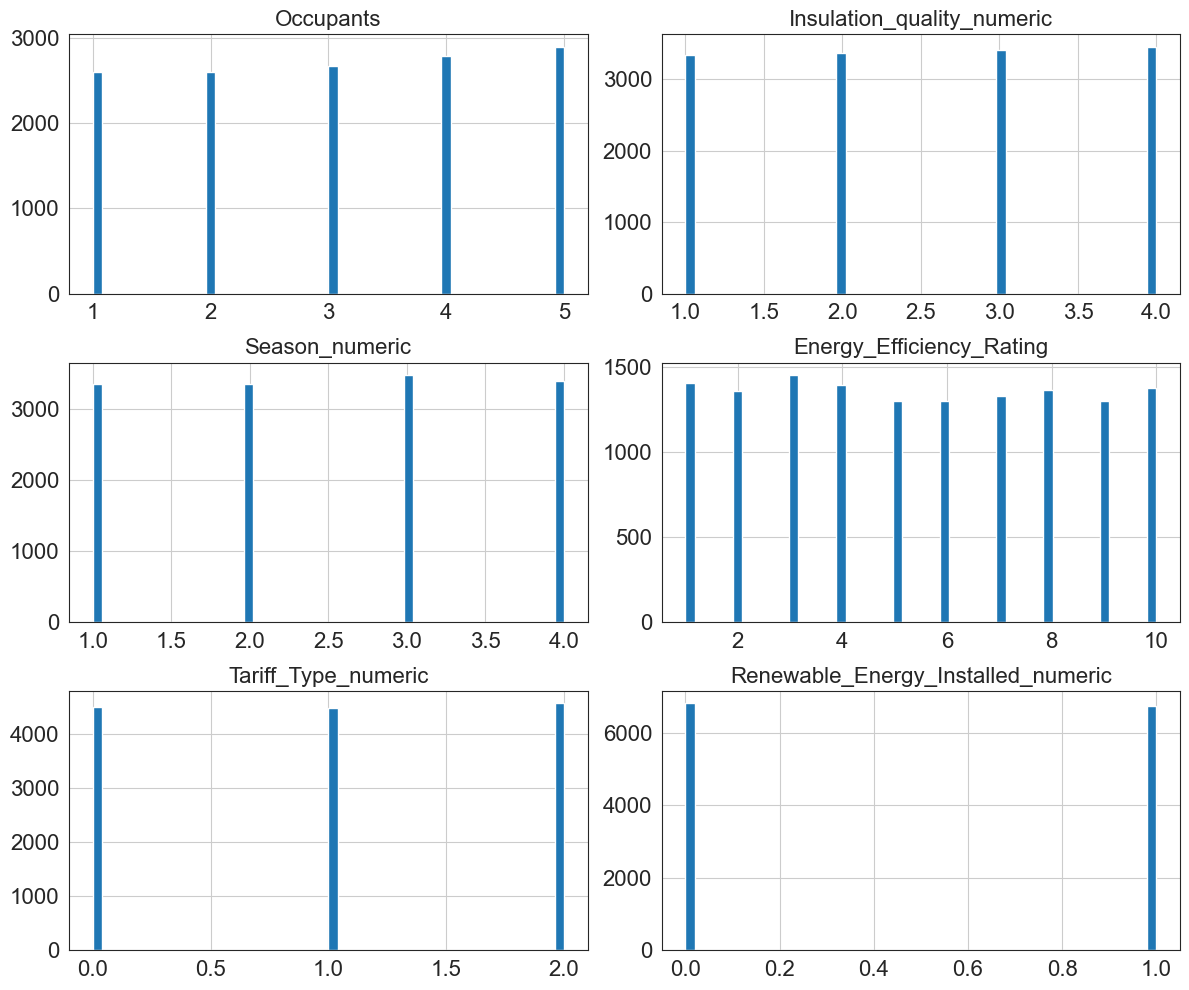

In [39]:
dfCategoricalNumeric.hist(bins=50, figsize=(12,10))
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

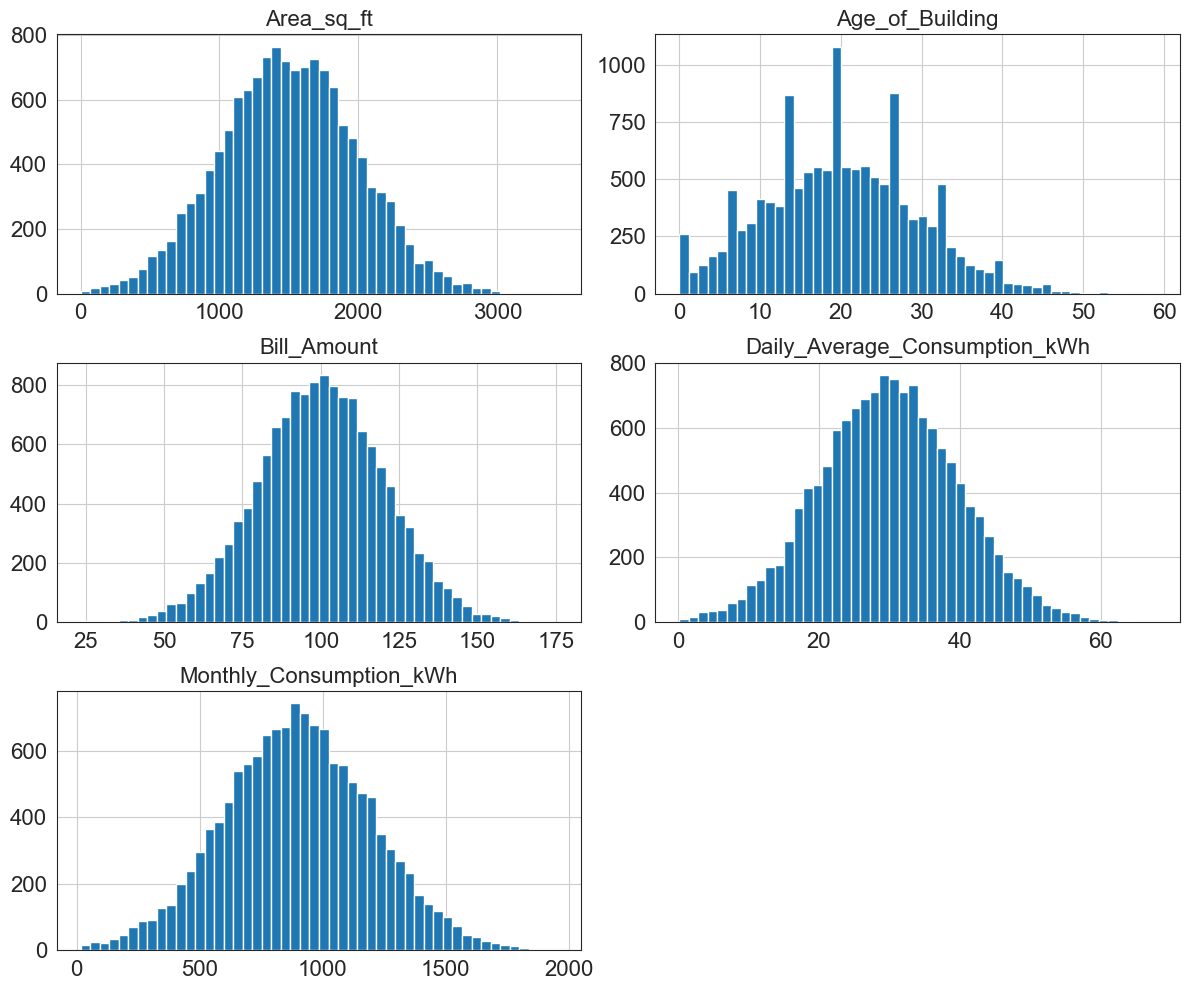

In [40]:
dfNumerical.hist(bins=50, figsize=(12,10))
plt.tight_layout() 
plt.show()

### Normalizing Data
After looking at the data we can clearly see that most of the data is a normal bell curve but `age_of_building` is not as such we will normailze this and the apply this to  the other Numerical data

In [41]:
df.describe()

,Area_sq_ft,Occupants,Age_of_Building,Daily_Average_Consumption_kWh,Energy_Efficiency_Rating,Bill_Amount,Temperature_Average,Power_Outages,Monthly_Consumption_kWh,Heating_Type_numeric,Insulation_quality_numeric,Season_numeric,Tariff_Type_numeric,Renewable_Energy_Installed_numeric
count,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.0,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000
mean,1496.089454,3.058555,20.019543,29.942214,5.453540,100.147602,60.147228,0.0,897.782650,1.469690,2.514749,2.507743,1.004425,0.497566
std,490.768836,1.419770,9.430497,9.836004,2.888068,20.048419,19.795413,0.0,299.761161,0.541346,1.118440,1.115142,0.817959,0.500013
min,1.000000,1.000000,0.000000,0.196002,1.000000,23.349016,0.273746,0.0,16.955531,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1163.000000,2.000000,13.000000,23.231915,3.000000,86.743956,46.965124,0.0,692.369810,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1493.500000,3.000000,20.000000,29.862058,5.000000,100.201606,59.785919,0.0,895.355659,1.000000,3.000000,3.000000,1.000000,0.000000
75%,1829.000000,4.000000,26.000000,36.554516,8.000000,113.713076,73.469849,0.0,1099.974577,2.000000,4.000000,3.000000,2.000000,1.000000
max,3431.000000,5.000000,59.000000,67.836049,10.000000,175.540731,129.185730,0.0,1953.377940,2.000000,4.000000,4.000000,2.000000,1.000000


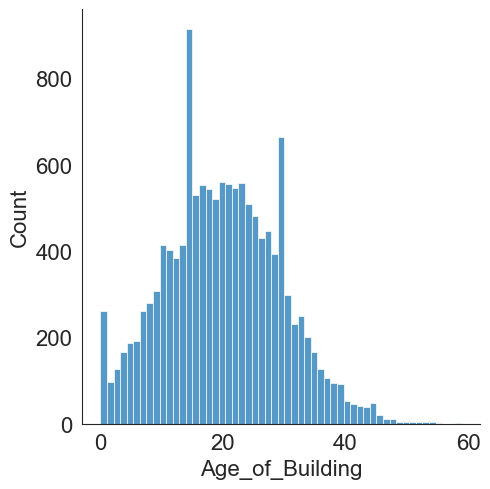

In [42]:
sns.displot(dfNumerical['Age_of_Building'])

### Standardization using Z-Score method

In [43]:
scaledData = df.copy()

In [44]:
def ZscoreRemoveOutliers(df, column):
    # Calculate mean and standard deviation
    mean = df[column].mean()
    stdDev = df[column].std()

    # Define a threshold for outliers
    threshold = 2.5

    # Identify outliers
    outliers = df[(df[column] - mean).abs() > threshold * stdDev]
    # Remove outliers
    dfClean = df.drop(outliers.index)

    return dfClean

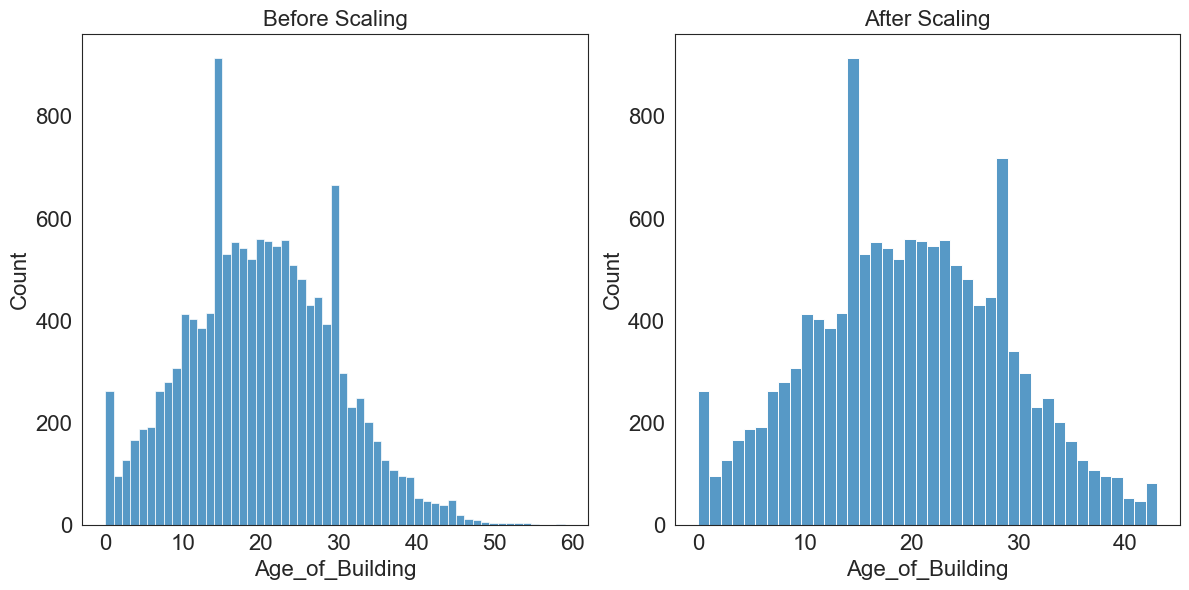

In [45]:
scaledData = ZscoreRemoveOutliers(scaledData, 'Age_of_Building')
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Before scaling plot
sns.histplot(df['Age_of_Building'], ax=axs[0])
axs[0].set_title('Before Scaling')

# After scaling plot
sns.histplot(scaledData['Age_of_Building'], ax=axs[1])
axs[1].set_title('After Scaling')

plt.tight_layout()
plt.show()

### Remove outliers using IQR
Created a function which takes a df and a column and removes the outliers based on the IQR.

In [46]:
def outliersBeGoneIQR(df, column):    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    dfOut = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return dfOut

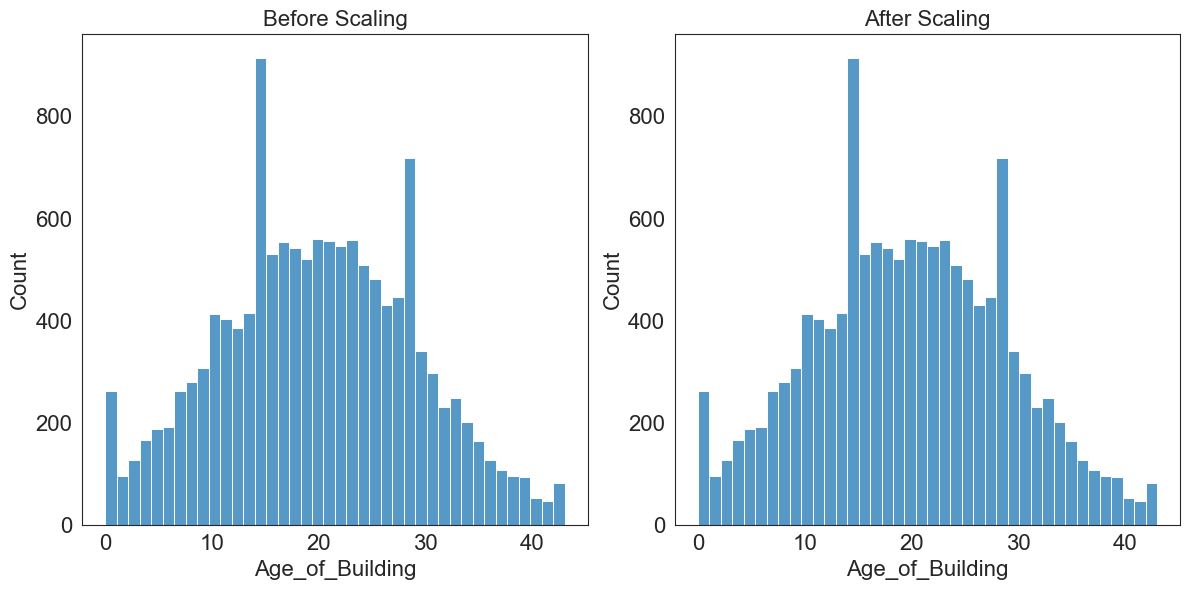

In [47]:
scaledData = outliersBeGoneIQR(scaledData, 'Age_of_Building')
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Before scaling plot
sns.histplot(scaledData['Age_of_Building'], ax=axs[0])
axs[0].set_title('Before Scaling')

# After scaling plot
sns.histplot(scaledData['Age_of_Building'], ax=axs[1])
axs[1].set_title('After Scaling')

plt.tight_layout()
plt.show()

### Outlier Correction Final
1. Apply `z-score` to all numerical columns
2. Apply `IQR` to all columns

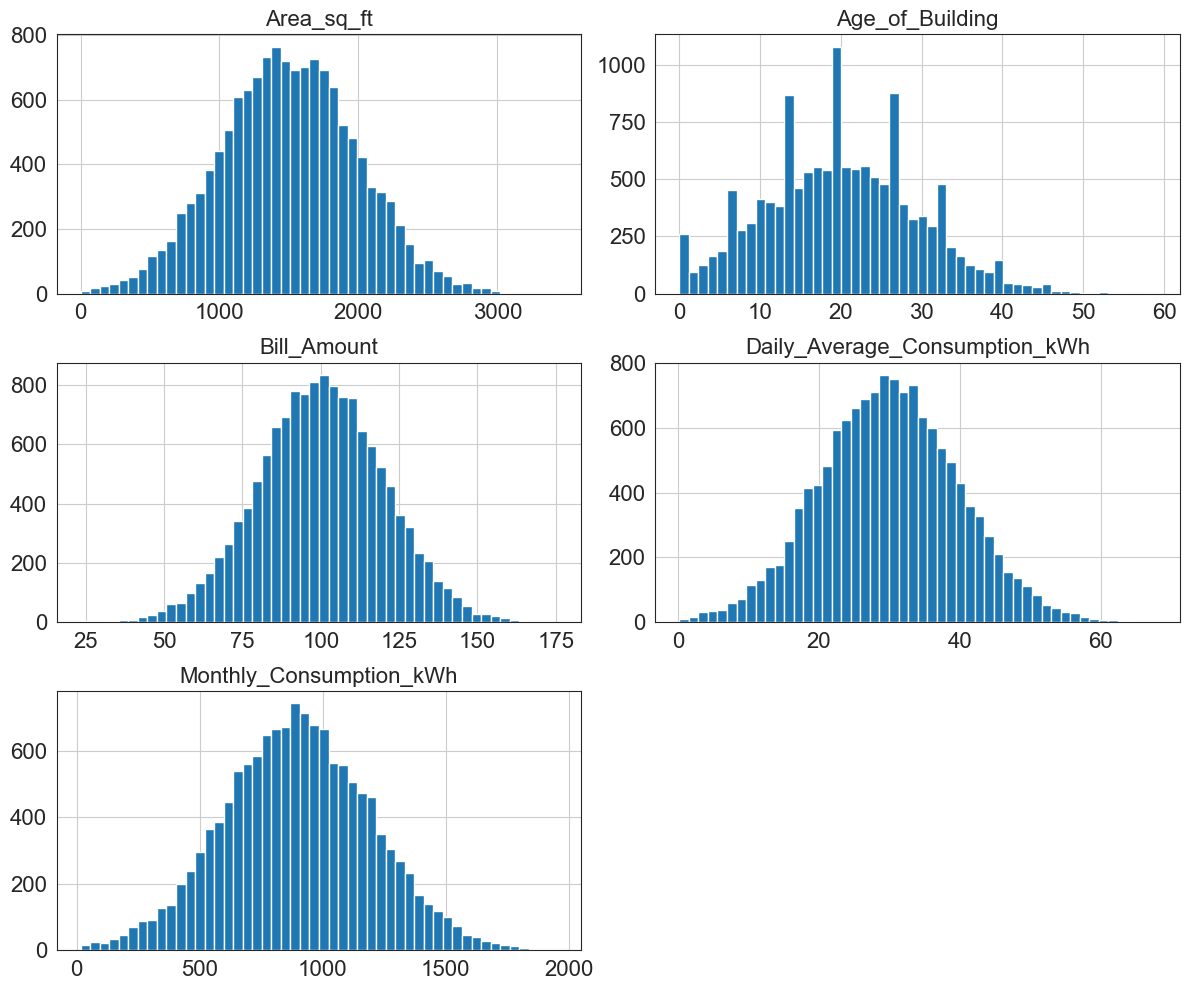

In [48]:
dfNumerical.hist(bins=50, figsize=(12,10))
plt.tight_layout() 
plt.show()

In [49]:
for column in dfNumerical.columns:
    print(column)
    scaledData = ZscoreRemoveOutliers(scaledData, column)
    scaledData = outliersBeGoneIQR(scaledData, column)

df = scaledData
dfSize(df)

Area_sq_ft
Age_of_Building
Bill_Amount
Daily_Average_Consumption_kWh
Monthly_Consumption_kWh
Current size: (12843, 19)
Previous size: (13560, 19)


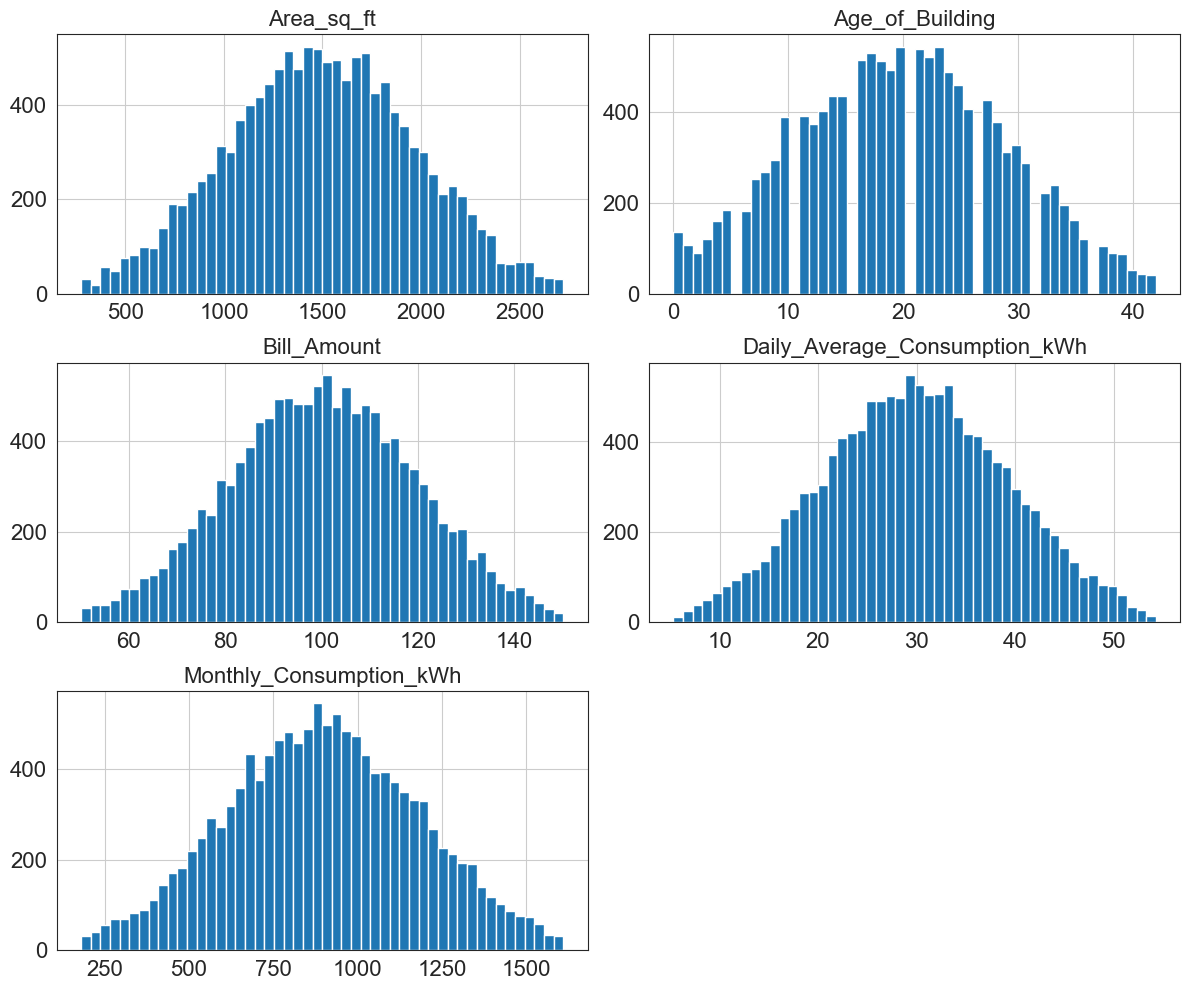

In [50]:
dfNumerical = df[[
    'Area_sq_ft',
    'Age_of_Building',
    'Bill_Amount',
    'Daily_Average_Consumption_kWh',
    'Monthly_Consumption_kWh'
    ]]


dfNumerical.hist(bins=50, figsize=(12,10))
plt.tight_layout() 
plt.show()

### kMeans
After exploring the data with a energy consumption corolla, I have concluded the data needs to be cleaned more as such I will use a kMean to attempt to make sense of it.

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
data = df[['Daily_Average_Consumption_kWh', 'Monthly_Consumption_kWh']]

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
dbscan.fit(data)

# Get labels (if label is -1, it's an outlier)
labels = dbscan.labels_

# Filter the DataFrame
dfNoOutliers = df[labels != -1]

Text(0, 0.5, 'Daily_Average_Consumption_kWh')

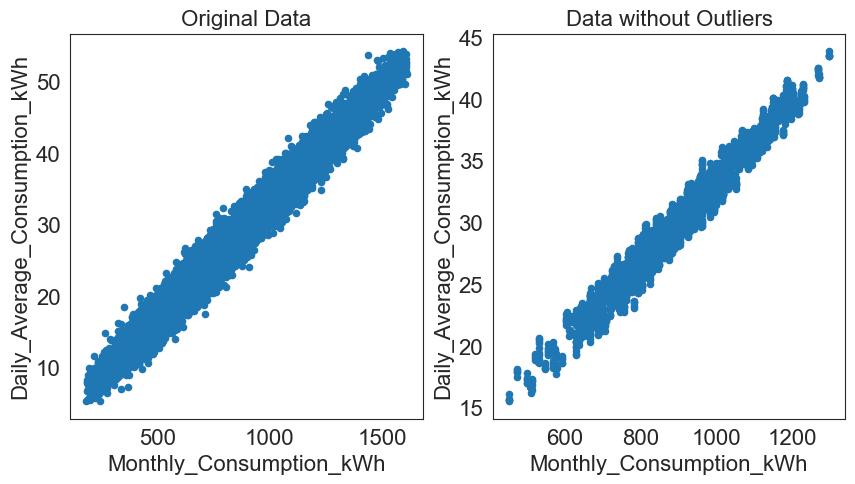

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

xColumn = 'Monthly_Consumption_kWh'
yColumn = 'Daily_Average_Consumption_kWh'

# Plot the original data
df.plot.scatter(x=xColumn, y=yColumn, ax=axs[0])
axs[0].set_title('Original Data')
axs[0].set_xlabel(xColumn)
axs[0].set_ylabel(yColumn)


# Plot the data without outliers
dfNoOutliers.plot.scatter(x=xColumn, y=yColumn, ax=axs[1])
axs[1].set_title('Data without Outliers')
axs[1].set_xlabel(xColumn)
axs[1].set_ylabel(yColumn)

In [54]:
df = dfNoOutliers
dfSize(df)

Current size: (3438, 19)
Previous size: (12843, 19)


## Linear Regression Models
#### Types:
- Vanilla
- Ridge
- Lasso
#### Evaluation
- RMSE at acceptable levels.
  - Models RMSE at acceptable levels.
  - Models R2 at acceptable levels.
  - Parameters optimised (when appropriate).

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('Monthly_Consumption_kWh', axis=1)
y = df['Monthly_Consumption_kWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


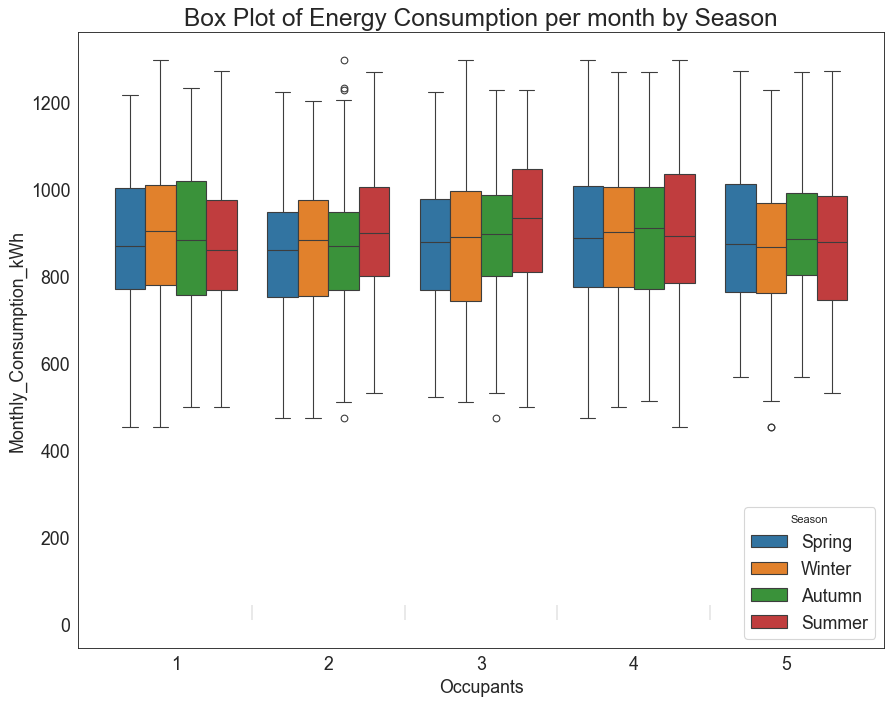

In [55]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='Occupants', y='Monthly_Consumption_kWh', data=df, hue='Season')
# sns.stripplot(x='Season', y='Monthly_Consumption_kWh', data=df, color='black', size=3, jitter=1)

for i in range(len(df['Occupants'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Energy Consumption per month by Season', fontsize=22)
plt.legend(title='Season')
plt.show()

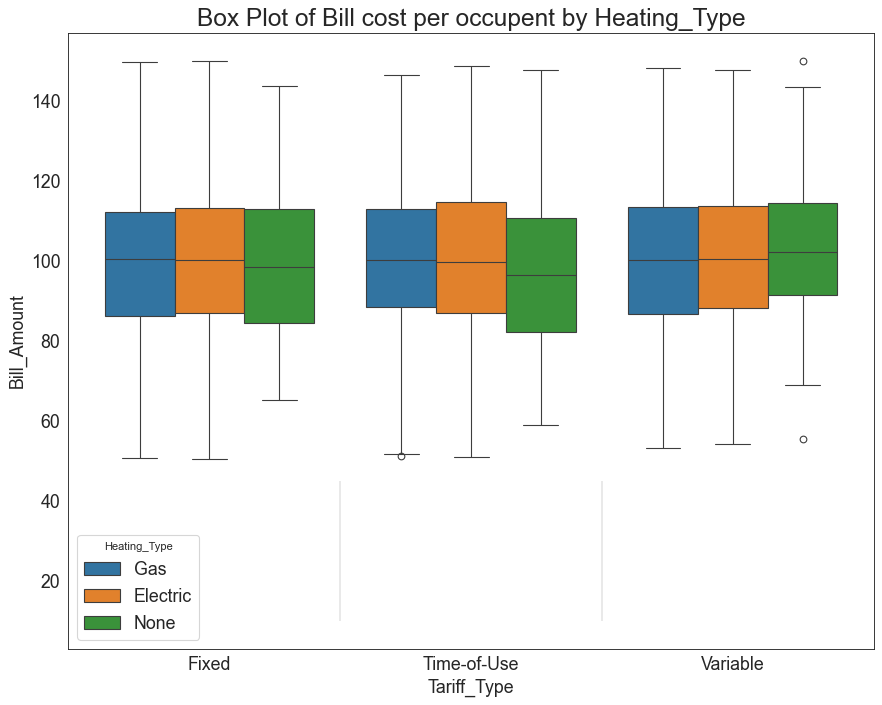

In [56]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='Tariff_Type', y='Bill_Amount', data=df, hue='Heating_Type')
# sns.stripplot(x='Season', y='Monthly_Consumption_kWh', data=df, color='black', size=3, jitter=1)

for i in range(len(df['Tariff_Type'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Bill cost per occupent by Heating_Type', fontsize=22)
plt.legend(title='Heating_Type')
plt.show()

In [57]:
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
spring = df[df['Season'] == 'Spring']
autumn = df[df['Season'] == 'Autumn']

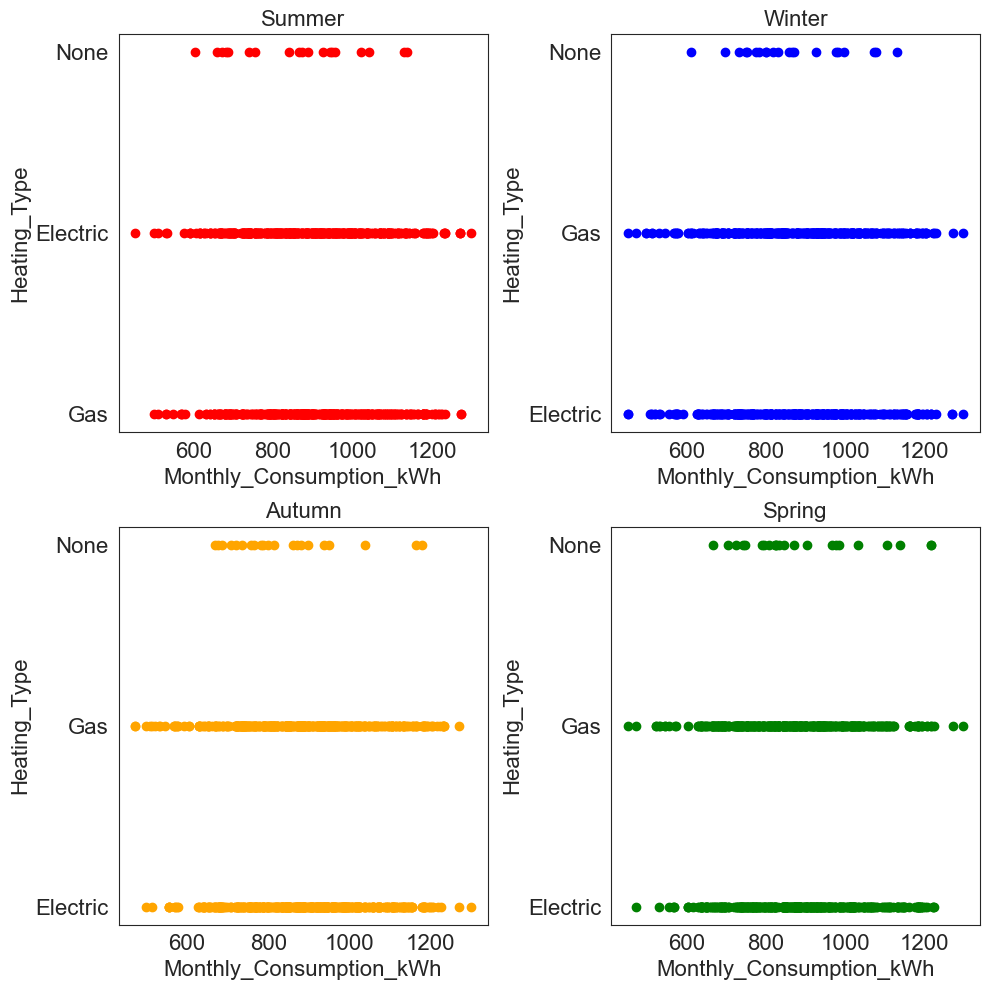

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

xColumn = 'Monthly_Consumption_kWh'
yColumn = 'Heating_Type'

# Summer plot
axs[0, 0].scatter(summer[xColumn], summer[yColumn], color='red')
axs[0, 0].set_title('Summer')

# Winter plot
axs[0, 1].scatter(winter[xColumn], winter[yColumn], color='blue')
axs[0, 1].set_title('Winter')

# Autumn plot
axs[1, 0].scatter(autumn[xColumn], autumn[yColumn], color='orange')
axs[1, 0].set_title('Autumn')

# Spring plot
axs[1, 1].scatter(spring[xColumn], spring[yColumn], color='green')
axs[1, 1].set_title('Spring')

for ax in axs.flat:
    ax.set(xlabel=xColumn, ylabel=yColumn)

plt.tight_layout()
plt.show()

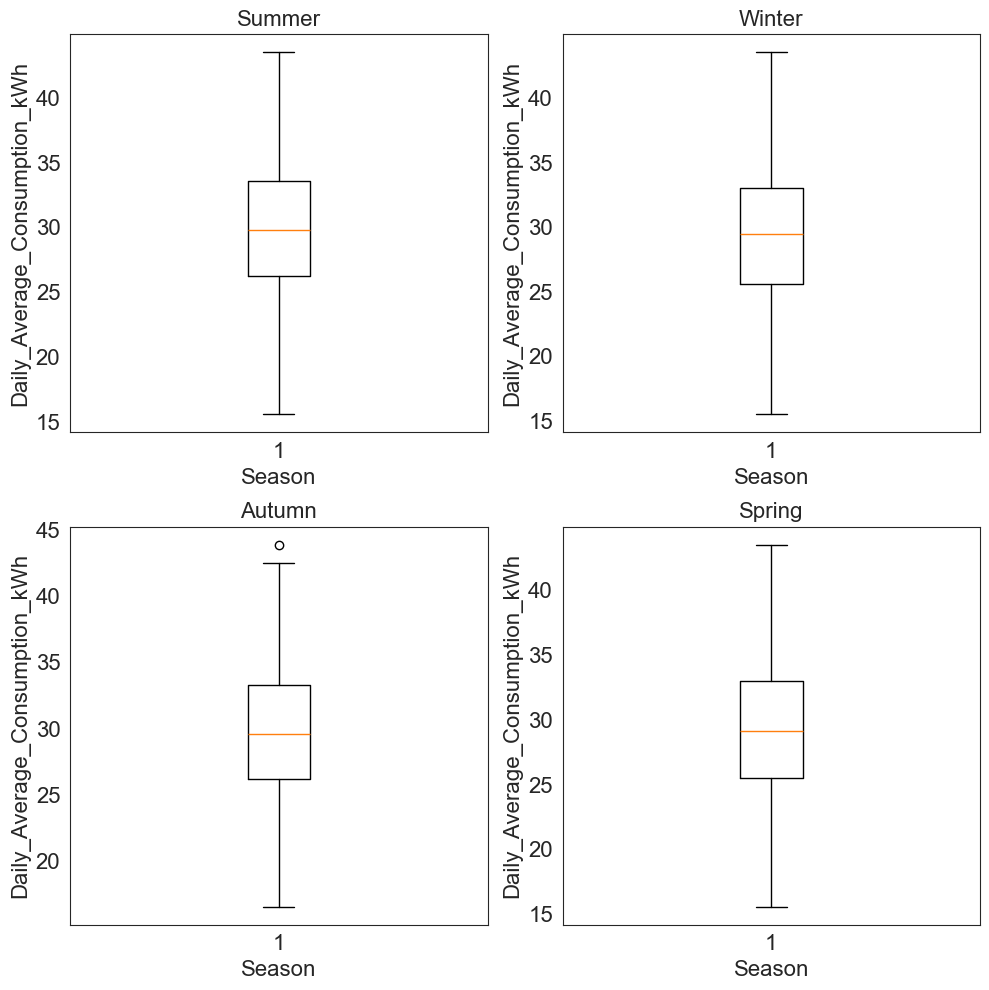

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

xColumn = 'Daily_Average_Consumption_kWh'

# Summer plot
axs[0, 0].boxplot(summer[xColumn])
axs[0, 0].set_title('Summer')

# Winter plot
axs[0, 1].boxplot(winter[xColumn])
axs[0, 1].set_title('Winter')

# Autumn plot
axs[1, 0].boxplot(autumn[xColumn])
axs[1, 0].set_title('Autumn')

# Spring plot
axs[1, 1].boxplot(spring[xColumn])
axs[1, 1].set_title('Spring')

for ax in axs.flat:
    ax.set(xlabel='Season', ylabel=xColumn)

plt.tight_layout()
plt.show()

In [60]:
def outliersBeGone(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    dfOut = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return dfOut

In [61]:
df = outliersBeGone(df, 'Daily_Average_Consumption_kWh')
dfSize(df)

Current size: (3438, 19)
Previous size: (3438, 19)


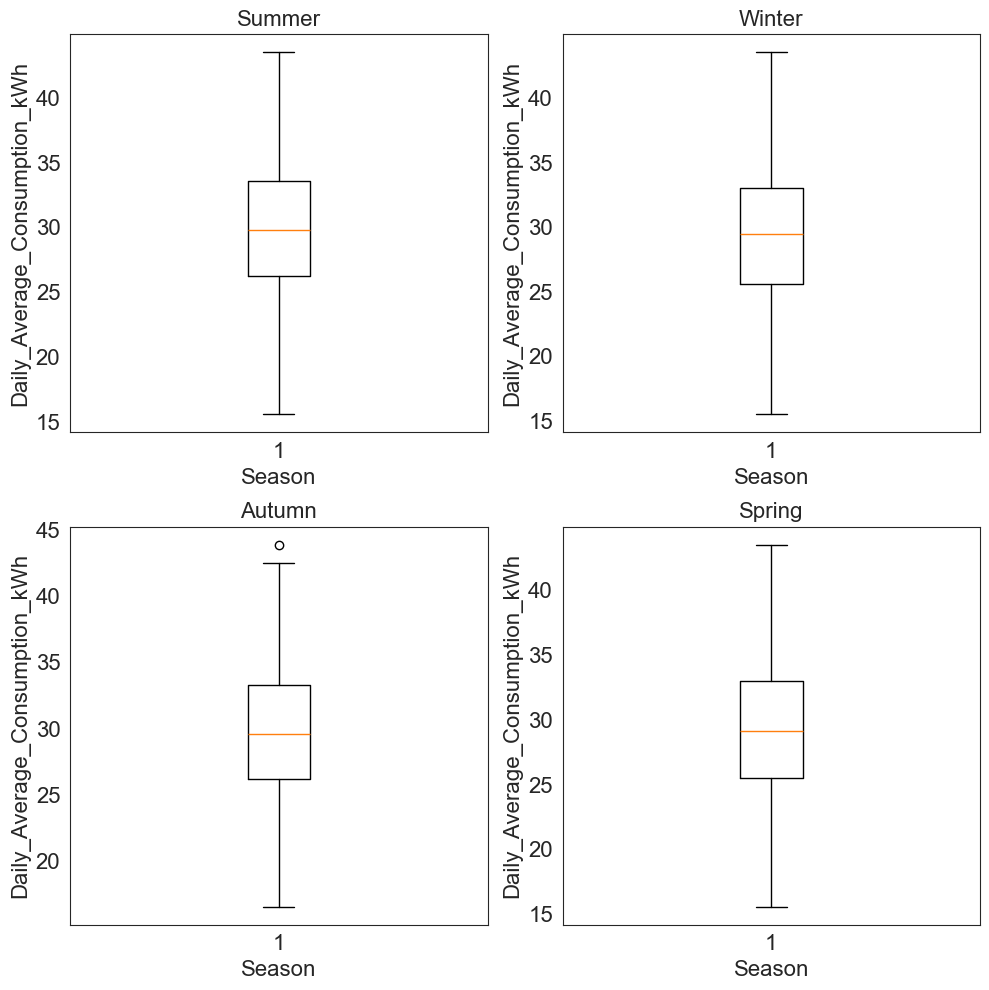

In [62]:
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
spring = df[df['Season'] == 'Spring']
autumn = df[df['Season'] == 'Autumn']
    
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

xColumn = 'Daily_Average_Consumption_kWh'

# Summer plot
axs[0, 0].boxplot(summer[xColumn])
axs[0, 0].set_title('Summer')

# Winter plot
axs[0, 1].boxplot(winter[xColumn])
axs[0, 1].set_title('Winter')

# Autumn plot
axs[1, 0].boxplot(autumn[xColumn])
axs[1, 0].set_title('Autumn')

# Spring plot
axs[1, 1].boxplot(spring[xColumn])
axs[1, 1].set_title('Spring')

for ax in axs.flat:
    ax.set(xlabel='Season', ylabel=xColumn)

plt.tight_layout()
plt.show()